<a href="https://colab.research.google.com/github/byanraff/Bangkit_Casptone_Garbage_Classifier_ML/blob/main/Inception_V3_Bangkit_Capstone_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Configuration environment
import os


os.environ['KAGGLE_USERNAME'] = "byanraff" # username from the json file
os.environ['KAGGLE_KEY'] = "e420ca3f14dd2c4f42d5b429a6edf9bb" # key from the json file

In [ ]:
#Download the garbage classification dataset
!kaggle datasets download -d asdasdasasdas/garbage-classification

 90% 74.0M/82.0M [00:01<00:00, 41.3MB/s]
100% 82.0M/82.0M [00:01<00:00, 65.3MB/s]


In [ ]:
import zipfile
from os import path, getcwd, chdir

path = f"{getcwd()}/../content/garbage-classification.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/content/garbageclass")
zip_ref.close()

In [ ]:

os.mkdir('/tmp/garbage_classification')
os.mkdir('/tmp/garbage_classification/training')
os.mkdir('/tmp/garbage_classification/testing')
os.mkdir('/tmp/garbage_classification/training/cardboard')
os.mkdir('/tmp/garbage_classification/training/glass')
os.mkdir('/tmp/garbage_classification/training/metal')
os.mkdir('/tmp/garbage_classification/training/paper')
os.mkdir('/tmp/garbage_classification/training/plastic')
os.mkdir('/tmp/garbage_classification/training/trash')
os.mkdir('/tmp/garbage_classification/testing/cardboard')
os.mkdir('/tmp/garbage_classification/testing/glass')
os.mkdir('/tmp/garbage_classification/testing/metal')
os.mkdir('/tmp/garbage_classification/testing/paper')
os.mkdir('/tmp/garbage_classification/testing/plastic')
os.mkdir('/tmp/garbage_classification/testing/trash')

In [ ]:
#split the Data
import random
import shutil
from shutil import copyfile
from random import sample

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
  f = os.listdir(SOURCE)
  train = sample(f,int(SPLIT_SIZE*len(f)))
  test = list(set(f) - set(train))
  train_2 = [(SOURCE + i) for i in train]
  dest_train = [(TRAINING+i) for i in train]
  for i,j in zip(train_2,dest_train):
    if os.path.getsize(i)>0:
      copyfile(i, j)
    else:
      print(i)
  
  test_2 = [(SOURCE + i) for i in test]
  dest_test = [(TESTING +i) for i in test]
  print(len(test_2),len(train_2),len(f))
  for m,l in zip(test_2, dest_test):
    if os.path.getsize(m)>0:
      copyfile(m, l)
    else:
      print(m)
  

Cardboard_SOURCE_DIR = "/content/garbageclass/garbage classification/Garbage classification/cardboard/"
TRAINING_Cardboard_DIR = "/tmp/garbage_classification/training/cardboard/"
TESTING_Cardboard_DIR = "/tmp/garbage_classification/testing/cardboard/"
Glass_SOURCE_DIR = "/content/garbageclass/Garbage classification/Garbage classification/glass/"
TRAINING_Glass_DIR = "/tmp/garbage_classification/training/glass/"
TESTING_Glass_DIR = "/tmp/garbage_classification/testing/glass/"
Metal_SOURCE_DIR = "/content/garbageclass/Garbage classification/Garbage classification/metal/"
Paper_SOURCE_DIR = "/content/garbageclass/Garbage classification/Garbage classification/paper/"
Plastic_SOURCE_DIR = "/content/garbageclass/Garbage classification/Garbage classification/plastic/"
Trash_SOURCE_DIR = "/content/garbageclass/Garbage classification/Garbage classification/trash/"
TRAINING_Metal_DIR = "/tmp/garbage_classification/training/metal/"
TRAINING_Paper_DIR = "/tmp/garbage_classification/training/paper/"
TRAINING_Plastic_DIR = "/tmp/garbage_classification/training/plastic/"
TRAINING_Trash_DIR = "/tmp/garbage_classification/training/trash/"
TESTING_Metal_DIR = "/tmp/garbage_classification/testing/metal/"
TESTING_Paper_DIR = "/tmp/garbage_classification/testing/paper/"
TESTING_Plastic_DIR = "/tmp/garbage_classification/testing/plastic/"
TESTING_Trash_DIR = "/tmp/garbage_classification/testing/trash/"

split_size = 0.9
split_data(Cardboard_SOURCE_DIR,TRAINING_Cardboard_DIR,TESTING_Cardboard_DIR,split_size)
split_data(Glass_SOURCE_DIR, TRAINING_Glass_DIR, TESTING_Glass_DIR, split_size)
split_data(Metal_SOURCE_DIR, TRAINING_Metal_DIR, TESTING_Metal_DIR, split_size)
split_data(Paper_SOURCE_DIR, TRAINING_Paper_DIR, TESTING_Paper_DIR, split_size)
split_data(Plastic_SOURCE_DIR, TRAINING_Plastic_DIR, TESTING_Plastic_DIR, split_size)
split_data(Trash_SOURCE_DIR, TRAINING_Trash_DIR, TESTING_Trash_DIR, split_size)

41 362 403
51 450 501
41 369 410
60 534 594
49 433 482
14 123 137


In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-05-29 03:36:14--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   132MB/s    in 0.6s    

2021-05-29 03:36:15 (132 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 17, 17, 768)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=360,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/garbage_classification/training',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300
        batch_size=32, shuffle = True, classes = ['cardboard','glass','metal','paper','plastic','trash'],
       
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/garbage_classification/testing',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=8,
        
        class_mode='categorical')

Found 2271 images belonging to 6 classes.
Found 256 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

callbacks = myCallback()

history = model.fit(train_generator, epochs=100, steps_per_epoch=70, validation_data = validation_generator, verbose = 1, validation_steps=15, callbacks=[callbacks])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(
  model, '/content/drive/MyDrive/1stClassificator_88'
)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/1stClassificator_88/assets


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow import keras


model = keras.models.load_model('/content/drive/MyDrive/Copy of 1stClassificator_88.h5')

uploaded = files.upload()

In [ ]:
! ls

1stClassificator_88	garbageclass		    sample_data
1stClassificator_88.h5	garbage-classification.zip


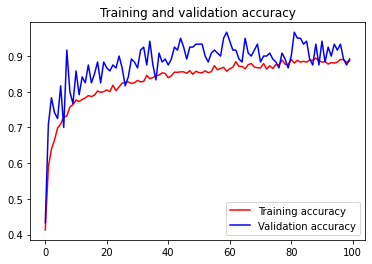

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow import keras


model = keras.models.load_model('/content/drive/MyDrive/1stClassificator_88.h5')

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

classes = classes.astype(int)
new_classes = classes.tolist()

idx=new_classes[0].index(1)

def switch_demo(idx):
    switcher = {
        0: "cardboard",
        1: "glass",
        2: "metal",
        3: "paper",
        4: "plastic",
        5: "trash",
    }
    print(switcher.get(idx, "Cannot detected"))

print("Your garbage are: ")
switch_demo(idx)



Saving 20190106_190107_0001.jpg to 20190106_190107_0001.jpg
20190106_190107_0001.jpg
[[0. 0. 0. 1. 0. 0.]]
Your garbage are: 
paper


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


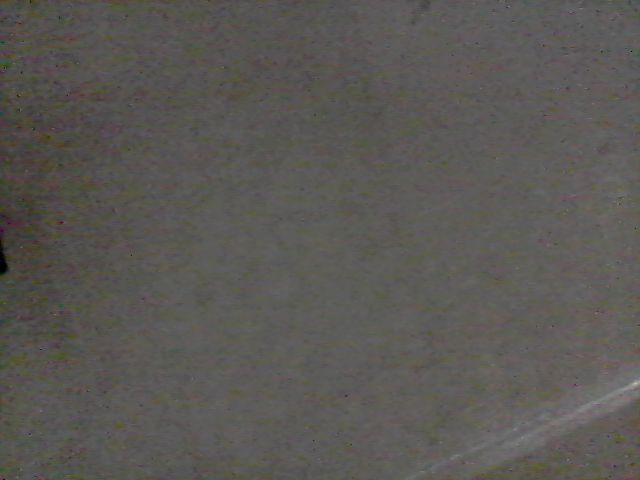

In [ ]:
from IPython.display import Image
try:
  pict = take_photo()
  print('Saved to {}'.format(pict))
  
  # Show the image which was just taken.
  display(Image(pict))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


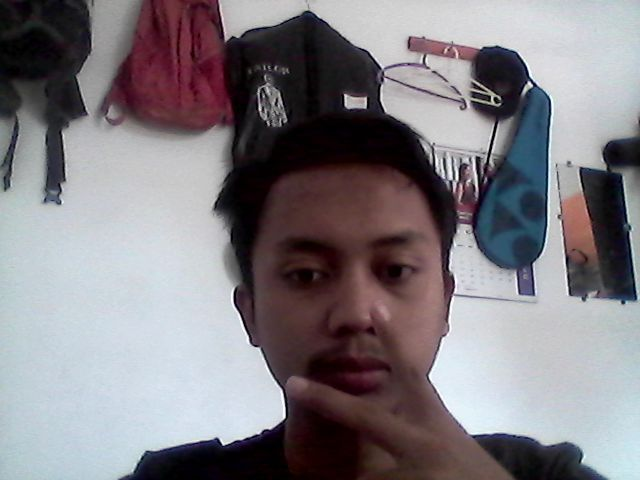

OSError: ignored

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow import keras

from IPython.display import Image
try:
  pict = take_photo()
  print('Saved to {}'.format(pict))
  
  # Show the image which was just taken.
  display(Image(pict))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

model = keras.models.load_model('/content/drive/MyDrive/1stClassificator_88.h5')

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = pict
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(pict)
  print(classes)